# Clustering 
1. Hierarchical clustering
2. K-means clustering
3. DBScanner clustering

#### Importing necessary libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth #
from sklearn.neighbors import NearestNeighbors #
from sklearn.mixture import GaussianMixture #
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform


In [57]:
df = pd.read_csv('Processed_Data.csv')

In [58]:
df.head(5)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_22,HR_23,customer_city,chain_category,engagement_duration,avg_order_frequency,tot_value_cui,preferred_order_day,preferred_order_hour,age_category
0,1b8f824d5e,2360,18,2.00,5.00,1.00,0.00,1.00,DELIVERY,DIGI,...,0.00,0.00,2,Large Chain,1,5.00,28.88,0,18,26
1,5d272b9dcb,8670,17,2.00,2.00,2.00,0.00,1.00,DISCOUNT,DIGI,...,0.00,0.00,8,Large Chain,1,2.00,19.21,0,10,16
2,f6d1b2ba63,4660,38,1.00,2.00,2.00,0.00,1.00,DISCOUNT,CASH,...,0.00,0.00,4,Large Chain,1,2.00,9.20,0,9,42
3,180c632ed8,4660,24,2.00,3.00,1.00,0.00,2.00,DELIVERY,DIGI,...,0.00,0.00,4,Large Chain,2,1.50,31.56,1,11,26
4,4eb37a6705,4660,20,2.00,5.00,0.00,0.00,2.00,No promo,DIGI,...,0.00,0.00,4,Non-Chain,2,2.50,55.44,1,8,26


In [72]:
cluster_features = ['vendor_count', 'is_chain', 'first_order', 'last_order', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('cluster_features', cluster_features)

cluster_features ['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


In [73]:
print(df[cluster_features].dtypes)

vendor_count                float64
is_chain                    float64
first_order                 float64
last_order                  float64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
engagement_duration           int64
tot_value_cui               float64
preferred_order_day           int64
preferred_order_hour          int64
age_category                  int64
dtype: object


With this we can confirm that all features features are numeric (`float64` and `int64`)

In [70]:
print(df.shape)  

(31875, 65)


In [74]:
print(cluster_features) 

['vendor_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


### Hierarchical Clustering 

##### Linkage Matrix

In [76]:
linkage_matrix = linkage(df[cluster_features].to_numpy(), method='ward')

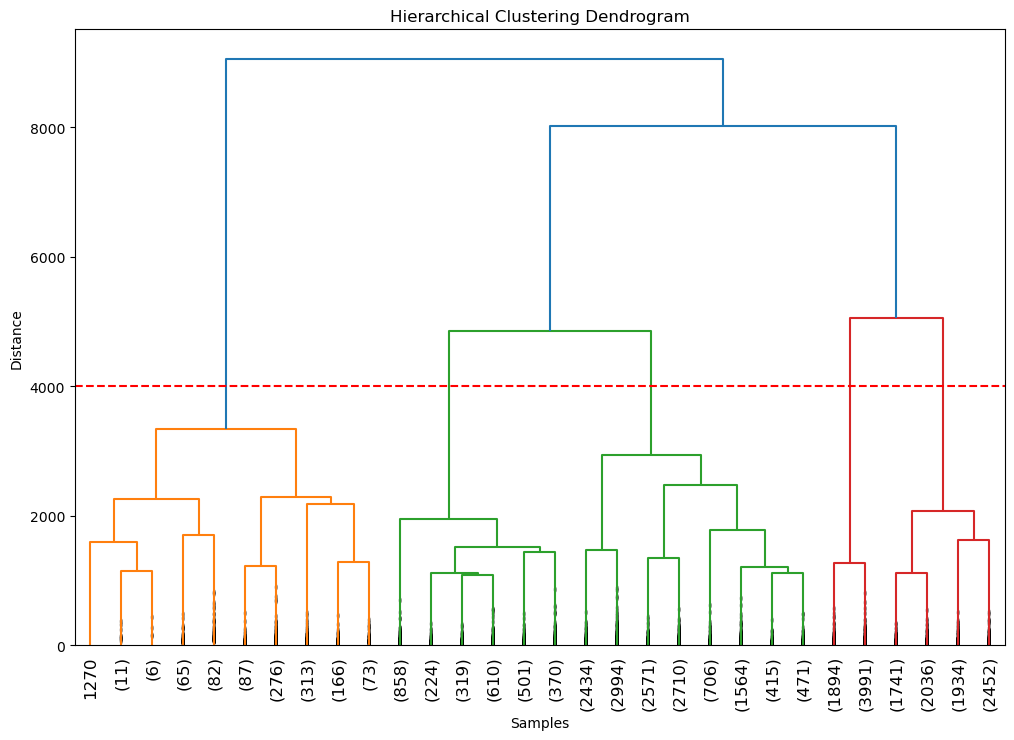

In [95]:
# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)

plt.axhline(y=4000, color='r', linestyle='--') 

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [99]:
cluster_labels = fcluster(linkage_matrix, t=4000, criterion='distance')

In [100]:
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

Cluster
3    13865
5     8163
4     5885
2     2882
1     1080
Name: count, dtype: int64


In [101]:
cluster_analysis = df[cluster_features].groupby(df['Cluster']).mean()

print(cluster_analysis)

         customer_region  customer_age  vendor_count  product_count  is_chain  \
Cluster                                                                         
1                6713.80         28.00          9.01          26.18      9.37   
2                6526.37         27.57          5.92          13.05      5.75   
3                4895.07         27.39          3.54           5.95      3.33   
4                5272.60         27.92          1.66           2.37      1.17   
5                5067.87         27.32          1.62           2.24      1.25   

         first_order  last_order  CUI_American  CUI_Asian  CUI_Beverages  ...  \
Cluster                                                                   ...   
1               9.53       82.30         20.46      66.90           5.81  ...   
2              12.47       80.56         12.82      29.75           5.98  ...   
3              19.79       72.54          4.60       7.58           2.29  ...   
4              66.84       

### 1. Dendrogram
The dendrogram was generated using the **Ward's Linkage** method, which minimizes the variation within clusters. 
- The red line represents the **cut-off height** defined at `t=150`.
- This line determines the number of clusters by "cutting" the dendrogram.
- The branches below the red line correspond to the formed clusters.

### 2. Formed Clusters
**5 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 1       | 860                |
| 2       | 11,382             |
| 3       | 5,113              |
| 4       | 6,428              |
| 5       | 8,092              |


### 2. K-Means ###

### 3. DBSCAN (Density-based spatial clustering of applications with noise)
### Testeeeeeee

In [65]:
# Splitting feature names into groups
# Remember which metric_features we decided to keep?
metric_features = df.select_dtypes(include=['number']).columns.tolist()

# Identify non-metric (categorical) features
non_metric_features = df.select_dtypes(exclude=['number']).columns.tolist()
pc_features = df.columns[df.columns.str.startswith('PC')].tolist()  

unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features+pc_features) ]

In [66]:
print('metric_features:', metric_features)
print('\nnon_metric_features:', non_metric_features)
print('\nunused_features:', unused_features)
print('\npc_features:', pc_features)

metric_features: ['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'customer_city', 'engagement_duration', 'avg_order_frequency', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category', 'Cluster']

non_metric_features: ['customer_id', 'last_promo', 'payment_method', 'chain_category']

unused_features: []

pc_features: []


In [67]:
# Display only columns with missing values
missing_values_all = df.isnull().sum()
missing_values = missing_values_all[missing_values_all > 0]

# Display the columns with missing values
print(missing_values)

avg_order_frequency    156
dtype: int64


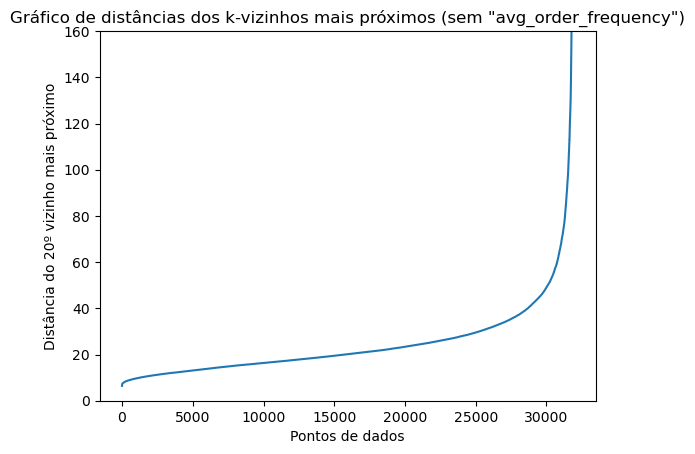

In [68]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Excluir a feature "avg_order_frequency" das metric features
features_for_distance = [feature for feature in metric_features if feature != "avg_order_frequency"]

# Calcular as distâncias dos k-vizinhos mais próximos
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df[features_for_distance])
distances, _ = neigh.kneighbors(df[features_for_distance])

# Ordenar as distâncias
distances = np.sort(distances[:, -1])

# Plotar o gráfico das distâncias
plt.plot(distances)
plt.xlabel('Pontos de dados')
plt.ylabel('Distância do 20º vizinho mais próximo')
plt.title('Gráfico de distâncias dos k-vizinhos mais próximos (sem "avg_order_frequency")')

# Alterar os limites do eixo y para 0 a 160
plt.ylim(0, 160)

plt.show()


In [69]:
# Concatenating the labels to df
df_concat = pd.concat([df[metric_features], pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

NameError: name 'dbscan_labels' is not defined

In [88]:
# Excluir a feature "total_value_cui" ao selecionar as features para o clustering
features_for_clustering = [feature for feature in metric_features if feature != "avg_order_frequency"]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=40, min_samples=25, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[features_for_clustering])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

#usei o eps=40 por causa do grafico
#usei min_samples=25 porque deve ser 2xdim e deve ser mais ou menos isso


Number of estimated clusters : 8


In [89]:
np.unique(dbscan_labels)


array([-1,  0,  1,  2,  3,  4,  5,  6])